# Debugging and visualizing data

In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

from popularity import PopularityRecommender
from content import ContentFiltering
from main import rec_dict, rec_args, debug_opt
from debug import Debug

### A few details on the available debugging options
- `MEASUREMENTS` is used to debug the `measurements` module. Right now, if enabled, it only supports plotting the distribution of interactions at a given timestep. It is possible to define a `measurement_visualization_rule` to plot the distribution -- see example below.
- `USER_SCORES` is used to debug the `user_scores` module. If enabled, it plots the distribution of the most liked items at the beginning of the execution.
- `RECOMMENDER` is used to debug the behavior of the recommender system.

In [2]:
# NOTE: Restart kernel before re-running this

# Set up debug options (see debug_opt in main.py)
debug_opt['MEASUREMENTS'] = False # debug measurement of equilibrium
debug_opt['USER_SCORES'] = True  # debug user preferences
debug_opt['RECOMMENDER'] = True # debug recommender system
# Configure and initialize debugger
debugger = Debug(list(debug_opt.keys()), list(debug_opt.values()))

USER_SCORES - Debugging module inizialized
RECOMMENDER - Debugging module inizialized


### Set up recommender system
This cell contains everything needed for setup.

In [3]:
# Set up the following
RECSYS_TYPE = 'content' # choose from supported (see rec_dict in main.py)
NUM_USERS = 5
NUM_ITEMS_PER_ITER = 2  # num items presented to each user at each iteration
STARTUP_TIMESTEPS = 2  # num iterations of 'exploration'
RUN_TIMESTEPS = 3  # total num iterations
NUM_ITEMS = 10 #round((STARTUP_TIMESTEPS + RUN_TIMESTEPS) * NUM_ITEMS_PER_ITER * np.random.uniform(1, 5))  # total num items in simulation

# Set up additional arguments (see rec_args[RECSYS_TYPE] in main.py for supported arguments)
# A: number of attributes; item_representation: attributes of each item
rec_args['content']['num_attributes'] = NUM_ITEMS
rec_args['content']['item_representation'] = np.zeros((NUM_ITEMS, rec_args['content']['num_attributes']))

# For content filtering, generate array of attributes
for i, row in enumerate(rec_args['content']['item_representation']):
    A = rec_args['content']['num_attributes']
    n_indices = np.random.randint(1, A)
    indices = np.random.randint(A, size=(n_indices))
    row[indices] = 1
    rec_args['content']['item_representation'][i,:] = row
# Add it to args
rec_args['content']['item_representation'] = rec_args['content']['item_representation'].T

# Check RECSYS_TYPE
if RECSYS_TYPE not in rec_dict:
    raise ValueError("Recommender system type not supported. Supported types: " + ', '.join(rec_dict))

### Instantiate and run

USER_SCORES - Shape: (5, 10)
USER_SCORES - Plot: Histogram of users liking each item the most


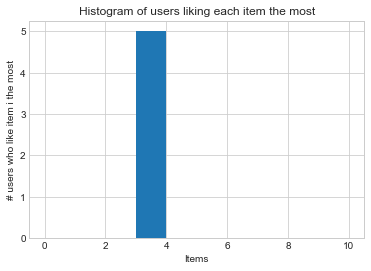

RECOMMENDER - Recommender system ready
RECOMMENDER - Num items: 10
RECOMMENDER - Users: 5
RECOMMENDER - Items per iter: 2
RECOMMENDER - Actual scores given by users (rows) to items (columns), unknown to system:
[[0.18 0.53 0.39 0.83 0.38 0.08 0.49 0.29 0.49 0.62]
 [0.53 0.51 0.24 0.77 0.31 0.01 0.58 0.16 0.68 0.25]
 [0.41 0.58 0.42 0.83 0.43 0.08 0.43 0.25 0.54 0.24]
 [0.21 0.48 0.44 0.77 0.42 0.08 0.48 0.48 0.34 0.40]
 [0.54 0.63 0.35 0.78 0.37 0.04 0.39 0.43 0.33 0.22]]
RECOMMENDER - Type of recommendation system: content
RECOMMENDER - Num attributes: 10
RECOMMENDER - Attributes of each item (rows):
[[1.00 0.00 1.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00]
 [1.00 1.00 0.00 1.00 1.00 1.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 1.00 0.00 1.00 1.00 1.00 0.00 0.00]
 [1.00 1.00 0.00 1.00 1.00 1.00 1.00 0.00 1.00 0.00]
 [0.00 0.00 1.00 1.00 0.00 1.00 0.00 1.00 0.00 1.00]
 [0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00]
 [1.00 1.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 1.00]
 [0.00 1.00 0.00 0.0

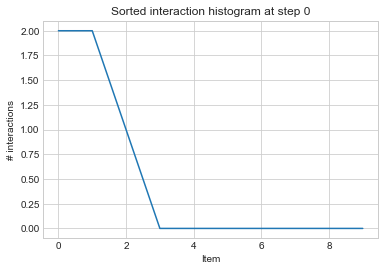

RECOMMENDER - System updates user profiles based on last interaction:
[[3 2 1 2 2 3 1 0 2 1]
 [1 2 0 1 0 2 2 3 1 1]
 [2 3 0 2 2 3 1 1 2 0]
 [2 2 1 1 1 3 0 1 2 1]
 [2 2 1 1 2 2 1 1 2 0]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.35 0.71 0.35 0.88 0.41 0.18 0.41 0.47 0.59 0.41]
 [0.08 0.46 0.62 0.69 0.54 0.15 0.69 0.38 0.38 0.62]
 [0.25 0.75 0.44 0.94 0.38 0.19 0.44 0.50 0.44 0.56]
 [0.29 0.64 0.36 0.79 0.50 0.21 0.43 0.50 0.64 0.57]
 [0.36 0.64 0.36 0.86 0.36 0.14 0.43 0.43 0.50 0.50]]
RECOMMENDER - Step 1
RECOMMENDER - Rec ordered:
[[5 0 2 4 9 6 7]
 [0 5 7 8 1 4 3]
 [5 0 4 2 6 8 7]
 [5 0 2 6 4 7 3]
 [5 2 4 6 7 8 1]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[0]
 [1]
 [2]
 [5]
 [5]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[2]
 [5]
 [0]
 [4]
 [6]]
USER_SCORES - User scores for given items are:
[[0.18 0.39]
 [0.51 0.01]
 [0.42 0.41]
 [0.08 0.42]
 [0.04 0.39]]
RECOMMENDE

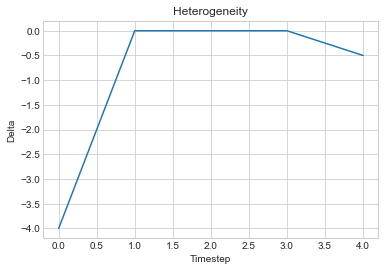

In [4]:
# Create recsys instance
rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, actual_user_scores=True, 
        debugger=debugger, **rec_args[RECSYS_TYPE])

# Startup
rec.startup_and_train(timesteps=STARTUP_TIMESTEPS)

# Runtime
rec.run(timesteps=RUN_TIMESTEPS, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)
 # lambda function
delta_t = rec.get_heterogeneity()

RECOMMENDER - Run -- interleave recommendations and random items from now on
RECOMMENDER - Step 0
RECOMMENDER - Rec ordered:
[[5 0 6 7 4]
 [0 5 7 8 3]
 [5 0 8 4 7]
 [5 0 2 6 3]
 [5 2 4 7 8]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[4]
 [7]
 [5]
 [5]
 [8]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[4]
 [8]
 [0]
 [2]
 [2]]
USER_SCORES - User scores for given items are:
[[0.38 0.38]
 [0.68 0.16]
 [0.41 0.08]
 [0.44 0.08]
 [0.35 0.33]]
RECOMMENDER - Users choose the following items respectively:
[4 8 0 2 2]


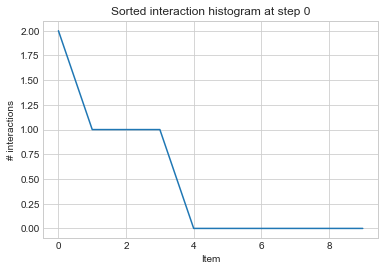

RECOMMENDER - System updates user profiles based on last interaction:
[[3 3 2 4 2 6 2 3 3 2]
 [3 3 2 3 1 5 2 4 2 3]
 [4 4 1 3 3 4 3 3 2 1]
 [2 3 2 3 2 6 1 3 2 3]
 [4 4 1 3 3 4 3 3 2 1]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.23 0.60 0.50 0.77 0.57 0.20 0.43 0.43 0.53 0.50]
 [0.21 0.54 0.50 0.68 0.61 0.18 0.54 0.43 0.54 0.50]
 [0.29 0.64 0.46 0.82 0.43 0.14 0.54 0.43 0.43 0.46]
 [0.22 0.59 0.48 0.70 0.63 0.22 0.44 0.52 0.56 0.52]
 [0.29 0.64 0.46 0.82 0.43 0.14 0.54 0.43 0.43 0.46]]
RECOMMENDER - Step 1
RECOMMENDER - Rec ordered:
[[5 0 6 7]
 [5 0 7 3]
 [5 8 4 7]
 [0 5 6 3]
 [5 8 4 7]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[5]
 [7]
 [7]
 [0]
 [8]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[6]
 [3]
 [5]
 [0]
 [7]]
USER_SCORES - User scores for given items are:
[[0.08 0.49]
 [0.16 0.77]
 [0.25 0.08]
 [0.21 0.21]
 [0.33 0.43]]
RECOMMENDER - Users choose the following

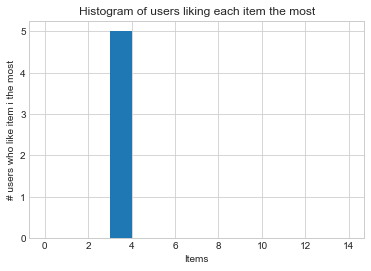

RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.28 0.60 0.44 0.74 0.53 0.19 0.49 0.49 0.53 0.47 0.30 0.26 0.12 0.23]
 [0.28 0.60 0.44 0.74 0.53 0.19 0.49 0.49 0.53 0.47 0.30 0.26 0.12 0.23]
 [0.28 0.60 0.44 0.74 0.53 0.19 0.49 0.49 0.53 0.47 0.30 0.26 0.12 0.23]
 [0.28 0.60 0.44 0.74 0.53 0.19 0.49 0.49 0.53 0.47 0.30 0.26 0.12 0.23]
 [0.28 0.60 0.44 0.74 0.53 0.19 0.49 0.49 0.53 0.47 0.30 0.26 0.12 0.23]]
RECOMMENDER - Rec ordered:
[[12 13 11 10]
 [12 13 11 10]
 [12 13 11 10]
 [12 13 11 10]
 [12 13 11 10]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[12]
 [10]
 [10]
 [10]
 [11]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[12]
 [11]
 [10]
 [10]
 [12]]
USER_SCORES - User scores for given items are:
[[0.41 0.41]
 [0.37 0.49]
 [0.49 0.49]
 [0.64 0.64]
 [0.45 0.45]]
RECOMMENDER - Users choose the following items respectively:
[12 11 10 10 11]
RECOMMENDER - System updates user profi

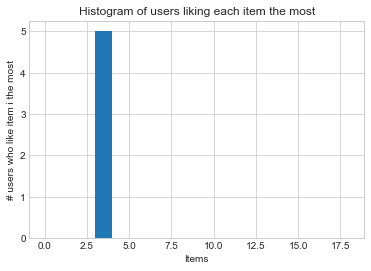

RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.27 0.60 0.44 0.79 0.48 0.17 0.50 0.44 0.54 0.46 0.35 0.27 0.13 0.29
  0.23 0.25 0.27 0.23]
 [0.27 0.60 0.44 0.79 0.48 0.17 0.50 0.44 0.54 0.46 0.35 0.27 0.13 0.29
  0.23 0.25 0.27 0.23]
 [0.27 0.60 0.44 0.79 0.48 0.17 0.50 0.44 0.54 0.46 0.35 0.27 0.13 0.29
  0.23 0.25 0.27 0.23]
 [0.27 0.60 0.44 0.79 0.48 0.17 0.50 0.44 0.54 0.46 0.35 0.27 0.13 0.29
  0.23 0.25 0.27 0.23]
 [0.27 0.60 0.44 0.79 0.48 0.17 0.50 0.44 0.54 0.46 0.35 0.27 0.13 0.29
  0.23 0.25 0.27 0.23]]
RECOMMENDER - Rec ordered:
[[14 17 15 16]
 [14 17 15 16]
 [14 17 15 16]
 [14 17 15 16]
 [14 17 15 16]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[17 15]
 [15 14]
 [17 16]
 [17 16]
 [17 15]]
USER_SCORES - User scores for given items are:
[[0.24 0.17]
 [0.35 0.17]
 [0.09 0.16]
 [0.06 0.33]
 [0.26 0.28]]
RECOMMENDER - Users choose the following items respectively:
[15 14 17 17 17]
RECOMMENDER - System up

In [5]:
# Run for a single step
rec.run(timesteps=10, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)

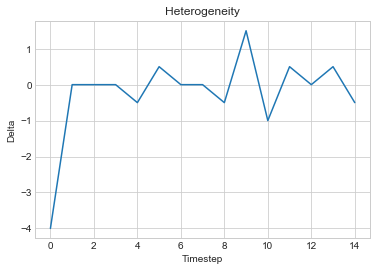

In [6]:
# Check heterogeneity again
delta_t = rec.get_heterogeneity()